In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from random import sample
df = pd.read_csv("Train_rev1.csv").sample(2500)

A1. What are the top 5 parts of speech in the job descriptions? How frequently do they appear? How do these numbers change if you exclude stopwords?
Hint: nltk.org is a great resource for exploring text mining with Python. There are many examples that are similar to the questions in this assignment.

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize,pos_tag, pos_tag_sents

In [4]:
#convert the series to a string
from string import punctuation
jd = ' '.join(df['FullDescription'])

#remove all punctuations
for p in punctuation:
    jd=jd.replace(p,'')

#tokenize the sentence and tag the words
tokens = nltk.word_tokenize(jd)
words = [token.lower() for token in tokens if len(token) > 1]
tags = nltk.pos_tag(words)

In [5]:
#count the number of part of speech
from collections import Counter
counts = Counter(tag for word,tag in tags)
counts.most_common(5)

[('NN', 154646), ('JJ', 70168), ('IN', 65957), ('NNS', 51552), ('DT', 36233)]

In [6]:
#remove stop_words
stop_words = set(stopwords.words('english')) 
filtered_words = [w for w in words if not w in stop_words]

#tag the words
tags_filtered = nltk.pos_tag(filtered_words)

#count the number of part of speech
counts_filtered = Counter(tag for word,tag in tags_filtered)
counts_filtered.most_common(5)

[('NN', 151332), ('JJ', 73088), ('NNS', 50799), ('VBG', 25342), ('VBP', 17052)]

A2. Does this data support Zipf’s law? Plot the most common 100 words in the data against the theoretical prediction of the law. For this question, do not remove stopwords. Also do not perform stemming or lemmatization.
Hint: Check http://www.garysieling.com/blog/exploring-zipfs-law-with-python-nltk-scipy-and-matplotlib

In [7]:
top_100 = Counter(words).most_common(100)

Text(0.5,0,'log(Counts of words)')

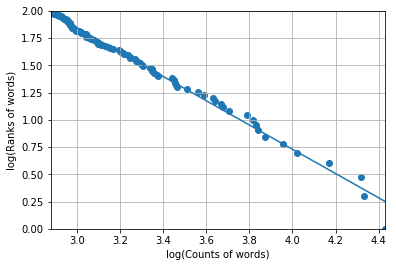

In [8]:
import nltk, pylab, math
from scipy import stats
fdist = nltk.FreqDist(words)
w = fdist.most_common()

x = [math.log10(i[1]) for i in w][:100]
y = [math.log10(i) for i in range(1, len(x))][:100]
x.pop()

(m, b) = pylab.polyfit(x, y, 1)
yp = pylab.polyval([m, b], x)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

pylab.plot(x, yp)
pylab.scatter(x, y)
pylab.ylim([min(y), max(y)])
pylab.xlim([min(x), max(x)])
pylab.grid(True)
pylab.ylabel('log(Ranks of words)')
pylab.xlabel('log(Counts of words)')

Text(0.5,0,'Counts of words')

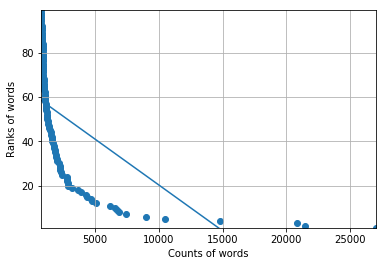

In [9]:
x2 = [i[1] for i in w][:100]
y2 = range(1, len(x2))[:100]
x2.pop()

(m, b) = pylab.polyfit(x2, y2, 1)
yp = pylab.polyval([m, b], x2)
slope, intercept, r_value, p_value, std_err = stats.linregress(x2,y2)

pylab.plot(x2, yp)
pylab.scatter(x2, y2)
pylab.ylim([min(y2), max(y2)])
pylab.xlim([min(x2), max(x2)])
pylab.grid(True)
pylab.ylabel('Ranks of words')
pylab.xlabel('Counts of words')

A3. If we remove stopwords and lemmatize the data, what are the 10 most common words? What are their frequencies?

In [10]:
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None # for easy if-statement 
    
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
l = []
for word, tag in tags_filtered:
    wntag = get_wordnet_pos(tag)
    if wntag is None:# not supply tag in case of None
        lemma = lemmatizer.lemmatize(word)
        l.append(lemma)
    else:
        lemma = lemmatizer.lemmatize(word, pos=wntag) 
        l.append(lemma)

In [11]:
count_lw = Counter(l)
top_10 = count_lw.most_common(10)
top_10

[('work', 5331),
 ('experience', 4900),
 ('team', 3203),
 ('role', 3088),
 ('client', 2954),
 ('business', 2930),
 ('service', 2555),
 ('skill', 2333),
 ('manager', 2239),
 ('within', 2185)]